# Pandas in a nutshell

Pandas is an essential python library, especially if you want to want to become a data scientist. 
Most of the work of adatascientist is data preparation, and that's what pandas is good at.

You can install it with

    pip install pandas
    
or with 

    conda install pandas
    
if you use Anaconda.

For a moderatley nice **cheat sheet** on data manipulation with pandas, check out https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf.
For the basic basics of plotting with pandas, see https://www.enthought.com/wp-content/uploads/2019/09/Enthought-Pandas-Cheat-Sheet-1-Plotting-with-Series-and-DataFrames-v1.0.2.pdf


## Importing the library
Pandas is typically imported into the namespace pd, just as numpy is typically imported as np.

In [27]:
import numpy as np
import pandas as pd

## Data Series
On Monday I told you that **pandas DataFrames** can be thought of as ExcelSheets. 
To begin with pandas, it is helpful to start with "one-column ExcelSheets" that are represented py **pandas Series**. For the full documentation of pandas Series see https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html.

0               Wallcreeper
1               Lammergeier
2               Lammergeier
3               Lammergeier
4             Dupont's Lark
5     Pin-tailed Sandgrouse
6               Lammergeier
7               Wallcreeper
8            Little Bustard
9             Dupont's Lark
10              Wallcreeper
11              Wallcreeper
12             Citril Finch
13           Black Wheatear
14                Snowfinch
Name: birds, dtype: object

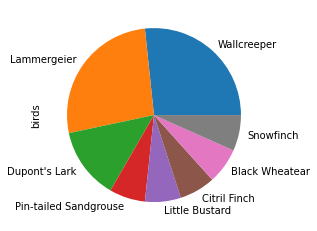

In [86]:
# Data Series of strings
observed_birds = pd.Series(["Wallcreeper",
                            "Lammergeier",
                            "Lammergeier",
                            "Lammergeier",
                            "Dupont's Lark",
                            "Pin-tailed Sandgrouse",
                            "Lammergeier",
                            "Wallcreeper",
                            "Little Bustard",
                            "Dupont's Lark",
                            "Wallcreeper",
                            "Wallcreeper",
                            "Citril Finch",
                            "Black Wheatear",
                            "Snowfinch"
                            ], 
                           dtype = str, # if you put nothing here, pandas inferres the type itself
                           name = "birds")
# and you can plot the number of appearances of each bird, e.g. in apie chart
observed_birds.value_counts().plot.pie()
observed_birds

Data Series can contain all types of data, and of course also floats. As an example, we'll draw som Gaussian random numbers and plot a histogram for them. Note that for adding a matplotlib line, we didn't even have to import matplotlib beforehand.

0       1.242846
1       1.761760
2       0.819304
3       1.584631
4       1.021719
          ...   
9995    1.218063
9996    2.570180
9997    4.198358
9998    2.636945
9999    2.917830
Length: 10000, dtype: float64

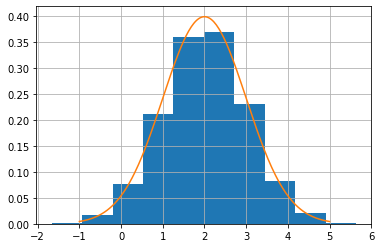

In [87]:
# you can also gererate a Data Series of floats...
sigma = 1
mu = 2
random_number = pd.Series(np.random.normal(mu, sigma, 10000)) # 10000 gaussian random numbers around 2 with sigma=1
# ... and plot the NORMALIZED histogram in one line
ax = random_number.hist(density=True)
# add the analytic formula of the gaussian 
x = np.linspace(-1, 5, 200)
ax.plot(x, np.exp(-(x-mu)**2/(2*sigma**2))/(np.sqrt(2*np.pi)*sigma))
random_number

Not below that simple numpy operations can be directly applied on a Series. The output is a gain a pandas Series. Also noe how you can adapt the number of bins in the histogram (default =10). See more features of the pandas hist function by typing
    
    help(random_number.hist())
    
Here, we print some statistics of abs(random_number) using the pandas Series funcion **describe**

count    10000.000000
mean         2.030452
std          0.967200
min          0.000163
25%          1.339006
50%          2.024345
75%          2.699822
max          5.635175
dtype: float64

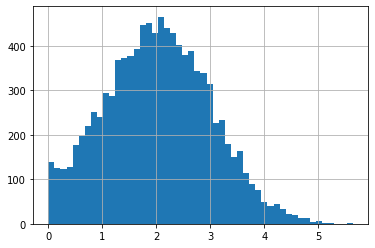

In [88]:
abs(random_number).hist(bins=50)
abs(random_number).describe()

## Pandas DataFrames
Now we really come to the Excel Sheets. Of course (!) pandas can do a LOT more than you could do with Excel, but their basic funcionalities are comparable. You find th efull documentation here: https://pandas.pydata.org/pandas-docs/stable/reference/frame.html.

### Generating Pandas DataFrames

In [112]:
# There are plenty of different ways to create a DataFrame. 
# I like to start from a **python dictionary** with lists as values.
country_dict = { "Country" :            ["UK",     "France", "Spain"],
                 "Captital":            ["London", "Paris", "Madrid"],
                 "Inhabitants Country in Mio": [67.22, 67.39, 47.35]}
pd.DataFrame(country_dict) # in jupyter, we just write the name of the dataFrame into the last line to show it nicely.
# in a *.py file (in a script) 

,Country,Captital,Inhabitants Country in Mio
0,UK,London,67.22
1,France,Paris,67.39
2,Spain,Madrid,47.35


In [113]:
# If you pass a dictionary with scalars instead of lists, you have to tell pandas how to interpret that (item())
fruit_colors = {"banana": "yellow",
                "apple" : "green",
                "orange": "orange",
                "cherry": "red",
                "berry" : "black",
                "hammer": "grey"
               }
fruit_df = pd.DataFrame(fruit_colors.items(), 
                        columns=["fruit", "color"])
fruit_df

,fruit,color
0,banana,yellow
1,apple,green
2,orange,orange
3,cherry,red
4,berry,black
5,hammer,grey


In [101]:
# at fist we will transform the birds Series slightly to create our first pandas dataframe. 
# we want two columns: one with the bird type and one with its count
pd.DataFrame(observed_birds.value_counts()).reset_index()

,index,birds
0,Wallcreeper,4
1,Lammergeier,4
2,Dupont's Lark,2
3,Pin-tailed Sandgrouse,1
4,Little Bustard,1
5,Citril Finch,1
6,Black Wheatear,1
7,Snowfinch,1


In [ ]:
from what I told you on Monday, 